# Data Analysis

## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
# pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_overview import DfOverview
from df_cleaner import DfCleaner
from vis_seaborn import *

## Data reading

In [4]:
df = pd.read_csv("../data/clean_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   bearer_id                146891 non-null  float64
 1   msisdn_number            146891 non-null  float64
 2   imei                     146891 non-null  float64
 3   imsi                     146891 non-null  float64
 4   last_location_name       146891 non-null  object 
 5   handset_manufacturer     146891 non-null  object 
 6   handset_type             146891 non-null  object 
 7   start                    146891 non-null  object 
 8   end                      146891 non-null  object 
 9   dur_(ms)                 146891 non-null  float64
 10  social_media_dl_(bytes)  146891 non-null  float64
 11  social_media_ul_(bytes)  146891 non-null  float64
 12  google_dl_(bytes)        146891 non-null  float64
 13  google_ul_(bytes)        146891 non-null  float64
 14  emai

The columns we would be doing this Univariate Analysis on has been given to us earlier

number of xDR sessions
Session duration
the total download(DL) and upload(UL) data
the total data volume for Applications

## Describe all  relevant variables and associated data types (slide). 

In [5]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
bearer_id,146891.0,1.014458e+19,2.892813e+18,6.917538e+18,7.349883e+18,7.349883e+18,1.304243e+19,1.318654e+19
msisdn_number,146891.0,3.596855e+10,8.792026e+11,3.360100e+10,3.365128e+10,3.366369e+10,3.368344e+10,3.370000e+14
imei,146891.0,4.844173e+13,2.238835e+13,4.400152e+11,3.546071e+13,3.572181e+13,8.611970e+13,9.900120e+13
imsi,146891.0,2.082017e+14,1.334711e+09,2.082001e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.082099e+14
dur_(ms),146891.0,1.001881e+05,5.898605e+04,7.142000e+03,5.852700e+04,8.639900e+04,1.331545e+05,2.450958e+05
social_media_dl_(bytes),146891.0,1.794825e+06,1.035401e+06,1.200000e+01,8.980890e+05,1.793409e+06,2.694640e+06,3.586064e+06
social_media_ul_(bytes),146891.0,3.291553e+04,1.900524e+04,0.000000e+00,1.643100e+04,3.290800e+04,4.932650e+04,6.587000e+04
google_dl_(bytes),146891.0,5.751422e+06,3.309586e+06,2.070000e+02,2.882586e+06,5.766576e+06,8.625551e+06,1.146283e+07
google_ul_(bytes),146891.0,2.056556e+06,1.189824e+06,3.000000e+00,1.024412e+06,2.054878e+06,3.088072e+06,4.121357e+06
email_dl_(bytes),146891.0,1.791751e+06,1.036007e+06,1.400000e+01,8.925730e+05,1.793613e+06,2.689786e+06,3.586146e+06


## Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.


## Non-Graphical Univariate Analysis

In [9]:
cols = ['social_media',
        'google',
        'email',
        'youtube',
        'netflix',
        'gaming',
        'other',
        'total_data']

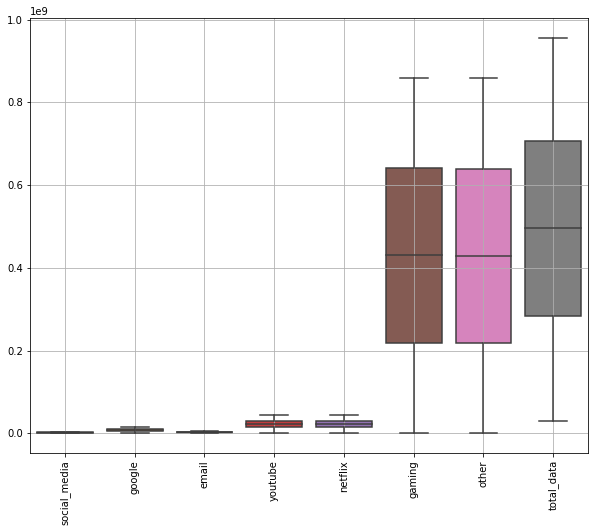

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data=df[cols])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[cols])

In [13]:
scaled_data = pd.DataFrame(scaled_array, columns=cols)
scaled_data.head()

,social_media,google,email,youtube,netflix,gaming,other,total_data
0,-0.248709,-1.393777,1.346460,-0.463631,-0.515614,-0.565074,-1.022611,-0.614279
1,0.101913,-0.964964,-1.233931,1.808328,1.397118,0.735655,0.463358,0.864836
2,-0.097978,0.688390,1.030736,1.274619,0.121160,-0.820908,-0.059037,-0.769484
3,-1.130054,1.138374,-0.175605,1.502811,-0.813977,1.556941,1.367429,1.610077
4,-0.883527,-0.016813,-0.138853,1.252662,-0.549677,0.413299,0.556531,0.457768


In [16]:
scaled_data.describe()

,social_media,google,email,youtube,netflix,gaming,other,total_data
count,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05,1.468910e+05
mean,-1.925210e-17,1.309917e-16,-8.944003e-17,9.258422e-17,-1.631107e-16,-1.006140e-17,-9.384189e-18,-9.055259e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.763455e+00,-2.208532e+00,-2.101269e+00,-2.435207e+00,-2.433358e+00,-1.761850e+00,-1.764401e+00,-1.909780e+00
25%,-8.656132e-01,-8.144169e-01,-8.403006e-01,-7.187660e-01,-7.179205e-01,-8.671288e-01,-8.667289e-01,-8.644184e-01
50%,-2.269504e-03,2.110054e-03,4.448533e-03,2.316832e-03,5.646252e-04,5.366688e-03,2.183667e-03,4.664470e-03
75%,8.685238e-01,8.174803e-01,8.407141e-01,7.194993e-01,7.191550e-01,8.653294e-01,8.650961e-01,8.625964e-01
max,1.760503e+00,2.195214e+00,2.108960e+00,2.439075e+00,2.437448e+00,1.756929e+00,1.769074e+00,1.882667e+00


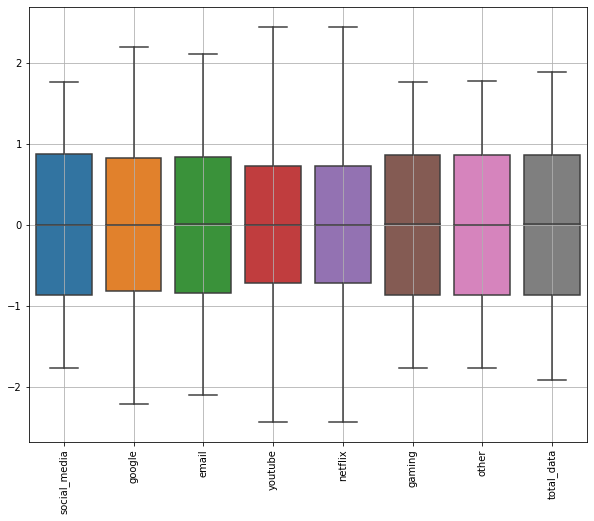

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
bp =sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)

In [ ]:
df.describe()

## Graphical Univariate Analysis

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


100429.10835


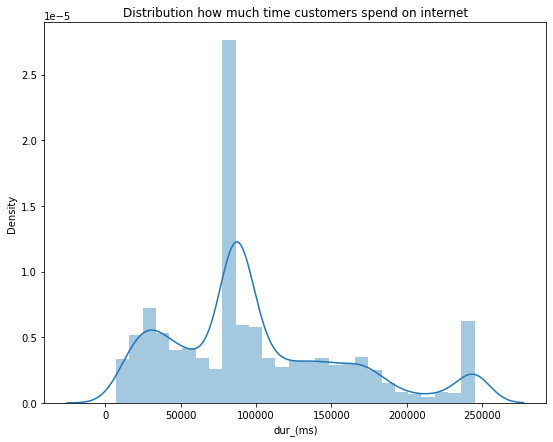

In [18]:
plt.figure(figsize=(9, 7))
sns.distplot(df.sample(20000)['dur_(ms)']).set_title(
    'Distribution how much time customers spend on internet')
print(df.sample(5000)['dur_(ms)'].mean())


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


495464332.8134


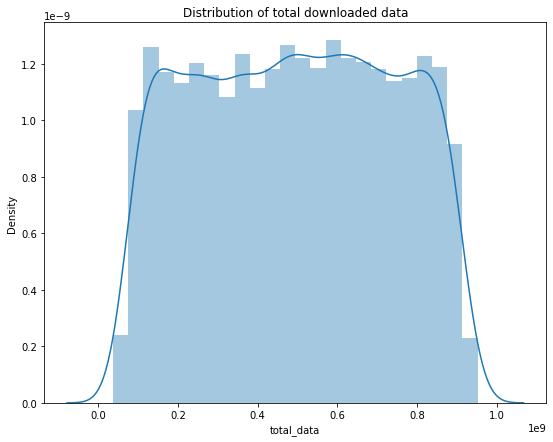

In [19]:
plt.figure(figsize=(9, 7))
sns.distplot(df.sample(10000)['total_data']).set_title(
    'Distribution of total downloaded data')
print(df.sample(10000)['total_data'].mean())

In [ ]:
histogram for categorical

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1803905.2555


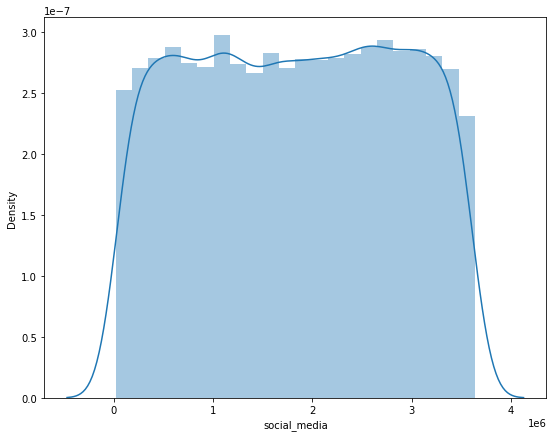

In [20]:
plt.figure(figsize=(9, 7))
sns.distplot(df.sample(10000)['social_media'])
print(df.sample(10000)['social_media'].mean())


## Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 


In [ ]:
plot

## Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [23]:
df['dur_5_decile'] = pd.qcut(df['dur_(ms)'], 5, labels=np.arange(1, 6))
total_data_per_decile = df.groupby('dur_5_decile').agg(
    {'total_data': 'sum', 'dur_(ms)': 'sum'})

total_data_per_decile


,total_data,dur_(ms)
dur_5_decile,,
1,1.456899e+13,8.358108e+08
2,2.274651e+13,3.534206e+09
3,6.349449e+12,1.126580e+09
4,1.454192e+13,3.471441e+09
5,1.461937e+13,5.748690e+09


([<matplotlib.axis.XTick at 0x126f9a790>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

<Figure size 720x504 with 0 Axes>

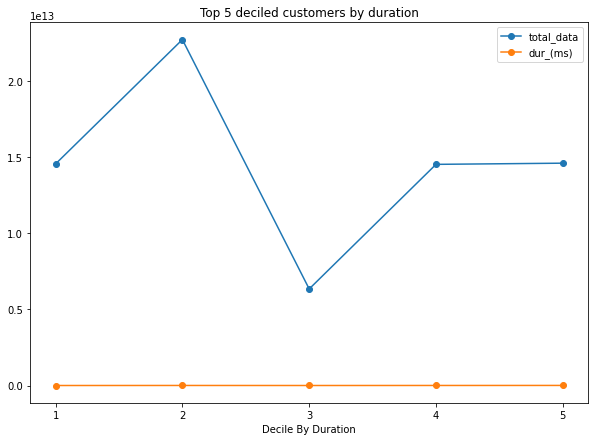

In [24]:
plt.figure(figsize=(10, 7))
total_data_per_decile.plot(linestyle='-', marker='o', figsize=(10, 7),
                           title='Top 5 deciled customers by duration').set_xlabel("Decile By Duration")
plt.xticks(np.arange(len(total_data_per_decile.index)),
           total_data_per_decile.index)


## Correlation Analysis 

In [29]:
data_usage_df = df[['social_media',
                   'google',
                    'email',
                    'youtube',
                    'netflix',
                    'gaming',
                    'other', ]].copy()
data_usage_corr = data_usage_df.corr(method='pearson')
data_usage_corr


,social_media,google,email,youtube,netflix,gaming,other
social_media,1.000000,-0.001919,0.004188,0.000580,0.001386,0.001901,0.005540
google,-0.001919,1.000000,-0.000049,0.002178,-0.002013,-0.000803,-0.001290
email,0.004188,-0.000049,1.000000,-0.003438,0.001499,0.000065,-0.000778
youtube,0.000580,0.002178,-0.003438,1.000000,0.003611,-0.003670,0.003235
netflix,0.001386,-0.002013,0.001499,0.003611,1.000000,-0.003532,-0.007927
gaming,0.001901,-0.000803,0.000065,-0.003670,-0.003532,1.000000,-0.002821
other,0.005540,-0.001290,-0.000778,0.003235,-0.007927,-0.002821,1.000000


[Text(0.5, 0, 'social_media'),
 Text(1.5, 0, 'google'),
 Text(2.5, 0, 'email'),
 Text(3.5, 0, 'youtube'),
 Text(4.5, 0, 'netflix'),
 Text(5.5, 0, 'gaming'),
 Text(6.5, 0, 'other')]

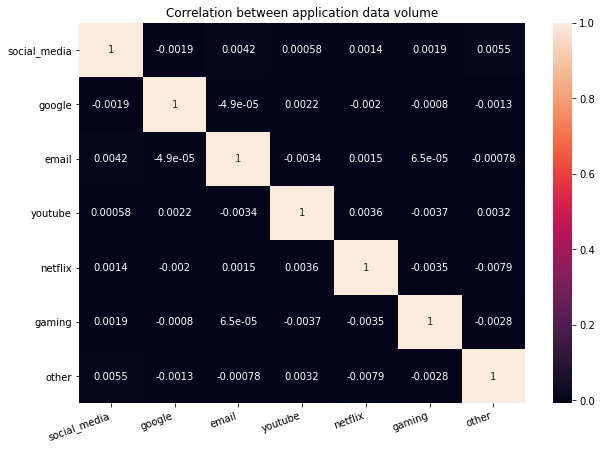

In [30]:
plt.figure(figsize=(10, 7))
ax = sns.heatmap(data_usage_corr,
                 xticklabels=data_usage_corr.columns,
                 yticklabels=data_usage_corr.columns,
                 annot=True,)
ax.set_title('Correlation between application data volume')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

## Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 

## Data Understanding

In [ ]:
print('\nNumber of unique values => ' + str(len(df['gaming_ul'].unique())))


## Data Cleaning